1. [Kinesis](#kinesis)
2. [Kinesis Data Streams](#kinesis-data-streams)
3. [Properties of Kinesis Data Streams](#properties-of-kinesis-data-streams)
4. [Kinesis Data Stream - Capacity Modes](#kinesis-data-stream---capacity-modes)
5. [Kinesis Data Streams Security](#kinesis-data-streams-security)
6. [Kinesis Data Streams - Producer](#kinesis-data-streams---producer)
7. [Avoid Hot partition issue](#avoid-hot-partition-issue)
8. [Kinesis - Provisioned Throughput Exceeded](#kinesis---provisioned-throughput-exceeded)
9. [Kinesis Data Streams - Consumer](#kinesis-data-streams---consumer)
10. [Custom consumer - Classic (shared) Fan Out vs Enhanced Fan Out](#custom-consumer---classic-shared-fan-out-vs-enhanced-fan-out)
11. [Kinesis Data Streams - Consumer - Lambda](#kinesis-data-streams---consumer---lambda)
12. [Setup Kinesis Data Streams](#setup-kinesis-data-streams)
13. [Check Kinesis Data Streams](#check-kinesis-data-streams)
14. [AWS CLI with Kinesis](#aws-cli-with-kinesis)
15. [Kinesis Client Library](#kinesis-client-library)
16. [KCL - Scaling KCL Apps](#kcl---scaling-kcl-apps)
17. [Kinesis Operations](#kinesis-operations)
18. [Kinesis Data Firehose](#kinesis-data-firehose)
19. [Setup Kinesis Data Firehose](#setup-kinesis-data-firehose)
20. [Dynamic Partitioning - Kinesis Data Firehose](#dynamic-partitioning---kinesis-data-firehose)
21. [Kinesis Data Analytics - SQL Applications](#kinesis-data-analytics---sql-applications)
22. [Kinesis Data Analytics (Amazon Managed Service) for Apache Flink](#kinesis-data-analytics-amazon-managed-service-for-apache-flink)
23. [Setup Amazon Managed Apache Flink - Kinesis Data Analytics](#setup-amazon-managed-apache-flink---kinesis-data-analytics)
24. [Random Cut Forest](#random-cut-forest)
25. [Kinesis vs SQS vs SNS](#kinesis-vs-sqs-vs-sns)

## Kinesis:
- Easy to collect, process, analyze streaming data in real-time
- Real-time data: Application logs, Metrics, Website click streams, IoT telemetry data, etc,.
- 4 types of services in Kinesis
    - Kinesis Data Streams: capture, process and store data streams
    - Kinesis Data Firehose: load data streams into AWS data stores
    - Kinesis Data Analytics: analyze data streams with SQL or Apache Flink
    - Kinesis Video Streams: capture, process and store video streams

##### Kinesis Data Streams:
- This service needs to provision shards before hand
- The data will be split across the number of shards provisioned
- Shards will determine the injection and consumption capacity 
- Producers: they send data into Kinesis data streams
    - Types:
        - Application
        - Client (Desktop, Mobile)
        - SDK, KPL (Kinesis Producer Library)
        - Kinesis Agent (send Application Logs into Kinesis Data streams)
    - Producers at low level rely on SDK and produce records into Kinesis Data Streams
    - Producers can send about 1MB data/sec or 1000 msgs/sec per shard
- Consumers: they read data from Kinesis data streams
    - Types:
        - Lambda
        - Kinesis Data Firehose
        - Kinesis Data Analytics
        - Application (SDK, KCL [Kinesis Client Library])
    - Consumers can receive about 2MB data/sec per shard for all consumers (shared) or per consumer (enhanced)
    
Note:
- Producers:
    - Record: a partition key (determine to which shard the data should go) + data blob (1 MB - the data value itself)

- Consumers:
    - Record: a partition key (determine to which shard the data is from) + sequence number (where the data was in the shard) + data blob (the data value itself)

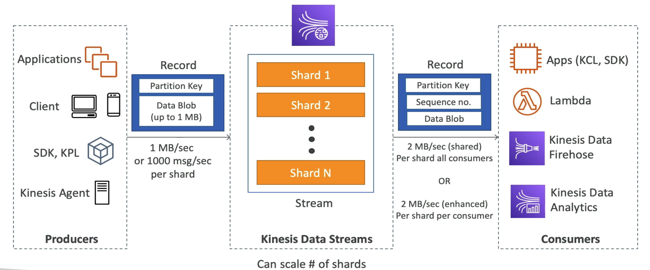

In [2]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/kds.jpeg')
new_image = img.resize((650, 270))
display(new_image)

##### Properties of Kinesis Data Streams:
- Retention between 1 to 365 days
- Ability to re-process data (replay)
- Once data is inserted in Kinesis, it can't be deleted (immutability)
- Message that share same partition key goes to the same shard (ordering)
- Producers: AWS SDK, Kinesis Producer Library (KPL), Kinesis Agent
- Consumers: 
    - Write your own: 
        - Kinesis Client Library (KCL), AWS SDK
    - Managed:
        - AWS LAmbda, AWS Kinesis Data Firehose, Kinesis Data Analytics

#### Kinesis Data Stream - Capacity Modes:

Provisioned Mode:
- Choose the number of shard provisioned, scale manually or using API
- Each shards get 1 MB/sec or 1000 records/sec IN
- Each shards get 2 MB/sec OUT (classic [overall] or enhanced fan out [per consumer])
- Pay per shard provisioned/hour

On-Demand Mode:
- No need to provision or manage shards
- Default capacity provisioned
- Automatic scaling based on load (observed throughput peak during last 30 days)
- Pay per stream/hour & data IN/OUT per GB

#### Kinesis Data Streams Security:

Encryption:
- Inflight: HTTPS endpoints
- At Rest: KMS Keys
- Client Side: if user takes care for encryption and decryption process
- Control Access via IAM policies
- VPC endpoints available for Kinesis to access within VPC
- Monitor API calls via CloudTrail

##### Kinesis In-flight Encryption:

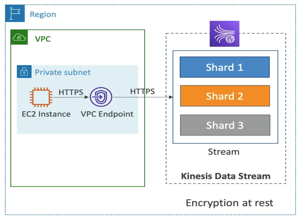

In [3]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/kdssecurity.jpeg')
new_image = img.resize((300, 220))
display(new_image)

#### Kinesis Data Streams - Producer:
- Send data into Kinesis Data Streams
- Record consist of:
    - Sequence number (unique per partition key within shard)
    - Partition Key (unique key related to the shard) 
    - Data Blob (up to 1 MB)
- Producers:
    - AWS SDK: Simple Producer
    - Kinesis Producer Library: C++, Java - built on top of AWS SDK with advanced capabilities with APIS such as batch processing, compression, retries
    - Kinesis Agent: monitor log files - built on top of Kinesis Producer Library
- Write Throughput: 1MB/sec or 1000 messages/sec
- Uses PutRecord API
- Use Batching with PutRecord API to reduce cost and increase throughput

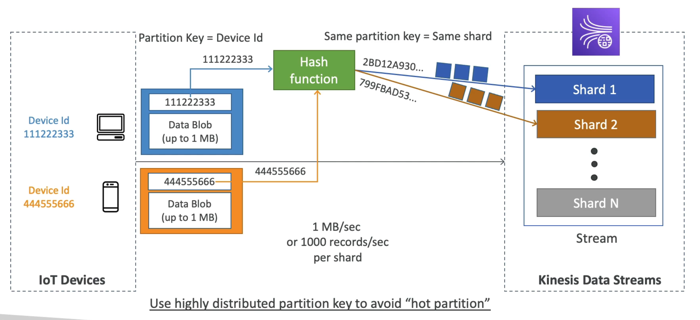

In [4]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/kdsproducer.jpeg')
new_image = img.resize((700, 320))
display(new_image)

##### Above Process Explained:
- Imagine we have Producers such as Desktops (111222333), Mobile Phones (444555666) which are denoted by device ID i.e. "Partition Key" in the above image
- These devices sends messages to Kinesis Data Stream with specific Device ID (111222333) & (444555666) i.e. Partition Key and Data Blob (up to 1 MB)
- The partition key from the message is then sent to the HASH function
- The partition key is hashed and the message is stored in a specific shard based on the hash output

#### Avoid Hot partition issue:
- Use highly distributed partition key to avoid hot partition
    - Hot Partition: a database issue that occurs when a partition or shard in a distributed database is more active than other partitions
    - e.g: 
        - Imagine, we assign partition key based on the type of browser used by the client
        - If client uses Chrome we have partition key as 112233 and if client uses Firefox the partition key is 223344. Since there are more internet users using Chrome than Firefox then there will be hot partition scenario occurring.


##### Kinesis - Provisioned Throughput Exceeded:
- If the producers send more message than 1000 or send more than 1 MB/sec messages then it will result in ProvisionedThroughputExceeded exception

Solution:
- Scale the shards
- Use highly distributed partition key
- Use exponential backoff

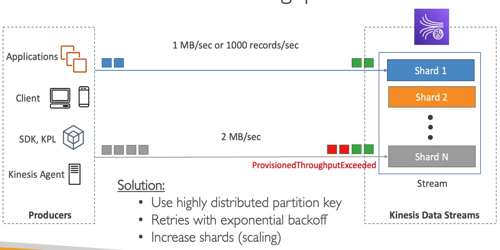

In [6]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/kdsexceed.jpeg')
new_image = img.resize((500, 250))
display(new_image)

#### Kinesis Data Streams - Consumer:
- Get data records from Kinesis Data Streams to process them
- Types of consumers:
    - Lambda
    - KCL (Kinesis Client Library - to read from Kinesis Data Streams)
    - Kinesis Data Analytics
    - Kinesis Data Firehose
    - AWS SDK (custom consumer) Classic or Enhanced - Fan Out

##### Custom consumer - Classic (shared) Fan Out vs Enhanced Fan Out:

Classic:
- The image on the left, the shard that sends data to different consumers have 2 MB/sec throughput overall
    - e.g. If 3 consumers then the throughput from KDS (shard) for each consumer will be 666.66 MB/sec
- Its the pull model
- When low number of consuming application
- Max: 5 GetRecordAPI calls/sec
- Returns up to 10 MB/sec or 10000 records (then throttle for 5 seconds)
- Latency: 200 ms
- Used to minimize cost

Enhanced:
- The image on the right, the shard that sends data to different consumers have 2 MB/sec throughput per consumer
    - e.g. If 3 consumers then the throughput from KDS (shard) for each consumer will be 2 MB/sec
- Its the push model
- When multiple consuming application
- Kinesis Data Stream pushes data to consumers via HTTP/2 (SubscribeToShard API)
- Soft limit of 5 consumer applications (KCL) per data stream (default)
- Latency: 70 ms
- Higher Cost

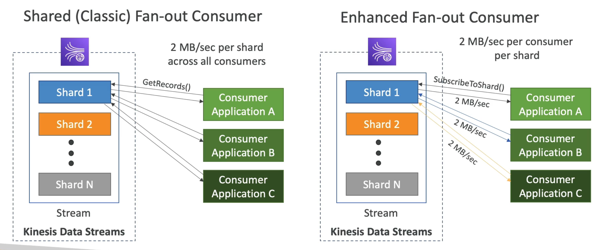

In [7]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/kdsshards.jpeg')
new_image = img.resize((600, 250))
display(new_image)

##### Kinesis Data Streams - Consumer - Lambda:
- supports both Classic and Enhanced Fan Out consumers
- reads records in batches
- configure batch size and batch window using GetBatch API
- if error occurs, lambda retries until succeeds or data expired
- can process up to 10 batches per shard simultaneously

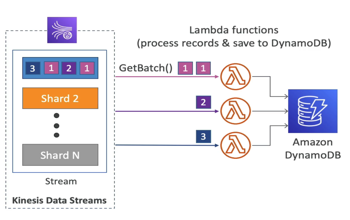

In [8]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/kdslambda.jpeg')
new_image = img.resize((350, 220))
display(new_image)

#### Setup Kinesis Data Streams:
- Go to Kinesis console from AWS
- Choose the kinesis service needed
    - Kinesis Data Streams *
    - Kinesis Data Analytics
    - Kinesis Data Firehose
- Click on "Create data stream"
    - Name
    - Capacity mode
        - On-demand
        - Provisioned
    - Create

#### Check Kinesis Data Streams:
- Go to Kinesis console
- Open the created Kinesis Data Stream
- Check the stream name, data retention period, and the number of shards
- Check the stream status (active or inactive)
- Check the streams options
    - Applications
        - Producers
            - Amazon Kinesis Agent (standalone Java software application)
            - AWS SDK (develop producers at low level)
            - Kinesis Producer Library (KPL - develop producers at high level with efficient APIs)
        - Consumers
            - Kinesis Data Analytics
            - AWS Lambda
            - Kinesis Data Firehose
            - Kinesis Client Library (KCL)
    - Monitoring
    - Configuration
    - Enhanced Fan Out

##### AWS CLI with Kinesis:
- Open CloudShell to execute AWS CLI commands for Kinesis

Producer Commands:
- v2:
    - aws kinesis put-record --stream-name "test" --partition-key "user1" --data "user signup" --cli-binary-format raw-in-base64-out

- v1:
    - aws kinesis put-record --stream-name "test" --partition-key "user1" --data "user signup"

Output of above Producer Commands:
- ShardId
- Sequence Number  

Consumer Commands:
- aws kinesis describe-stream --stream-name "test" 

Output of above Consumer Commands:
- Stream Description
    - Shard
        - ShardId
        - HashKeyRange
            - StartingHashKey
            - EndingHashKey
        - Sequence Number Range
    - StreamARN
    - StreamStatus
    - StreamName
    - RetentionPeriodHours
    - EnhancedMonitoring
        - ShardLevelMetrics

- aws kinesis get-shard-iterator --stream-name "test" --shard-id "shardId-100000000000" --shard-iterator-type "TRIM_HORIZON"

Output of above Consumer Commands:
- ShardIterator


- aws kinesis get-records --shard-iterator "ShardIterator Value" (from above command)

Output of above Consumer Commands:
- Records
    - Sequence Number
    - ApproximateArrivalTimestamp
    - Data (base64 encoded)
    - PartitionKey

#### Kinesis Client Library:
- A Java Library that helps read records from Kinesis Data Streams with distributed applications sharing the read workload
- Each shard read by only one KCL instance
    - 4 Shards = 4 KCL instances
    - 6 Shards = 6 KCL instances
- Progress of reading records from Kinesis Data Streams is check pointed into DynamoDB (needs IAM access)
- Track the other workers of KCL and share the work amongst shards using DynamoDB
- KCL can run on EC2 instance, Elastic Beanstalk and on-premises
- Records are read in order at shard level
- Versions:
    - KCL v1 (support shared consumer)
    - KCL v2 (supports shared and enhanced fan-out consumer)


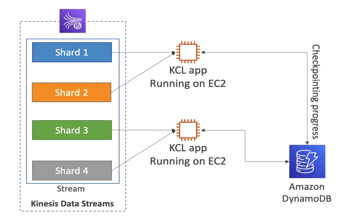

In [9]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/kcl.jpeg')
new_image = img.resize((350, 220))
display(new_image)

##### KCL - Scaling KCL Apps:

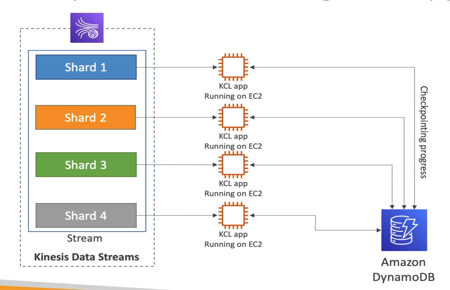

In [10]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/kcl1.jpeg')
new_image = img.resize((450, 290))
display(new_image)

- if the number of shards increases then the KCL apps will share more than one shard

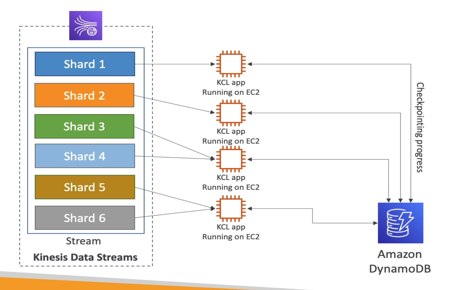

In [11]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/kcl2.jpeg')
new_image = img.resize((450, 290))
display(new_image)

#### Kinesis Operations:

Shard Splitting:
- Used to increase the stream capacity (1 MB/sec data per shard)
- Used to divide "hot shard"
- During Shard splitting, we close the running shard (2) and generate new ones i.e. shard (4 new) & shard (5 new). Then, shard (2) will be deleted once data is expired
- No auto scaling in Kinesis Data Streams (manually increase and decrease capacity)
- Cannot split a shard into more than two shards in a single operation 

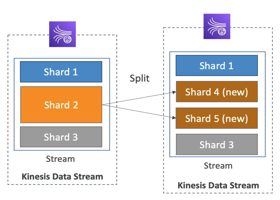

In [12]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/kinesisoperation.jpeg')
new_image = img.resize((280, 200))
display(new_image)

Shard Merging:
- Decrease capacity and save cost
- Can be used to group two shard with low traffic (cold shards)
- During Shard merging, we close the running shard (1) & shard (4) and generate new ones i.e. shard (6 new). Then, shards (1) & (4) will be deleted once data is expired
- Cannot merge more than two shards into one shards in a single operation 

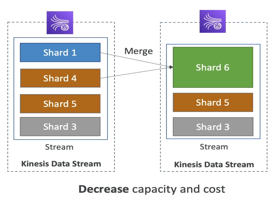

In [13]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/kinesisoperation2.jpeg')
new_image = img.resize((280, 200))
display(new_image)

#### Kinesis Data Firehose:
- Fully managed service, automatic scaling, serverless
- Producers send data record up to 1 MB/sec
- Producers:
    - Kinesis Data Streams
    - Amazon CloudWatch
    - AWS IoT
    - Kinesis Agent
    - AWS SDK
    - Applications
    - Client
- Consumers:
    - Amazon OpenSearch
    - Amazon Redshift (Copy via S3)
    - Amazon S3
    - HTTP Endpoints
    - 3rd Party Applications (MongoDB, DataDog, Splunk, NewRelic, LogicMonitor etc,.)
- Pay for data going through Firehose
- Near Real-time
    - Buffer interval: 0 sec (no buffering) - 900 secs 
    - Buffer size: 1 MB (need to specify, if we specify buffer time)
- Supports many data formats, compression, conversions, transformations
- Supports custom data transformations using AWS Lambda
- Can send All or Failed data to back up S3 bucket

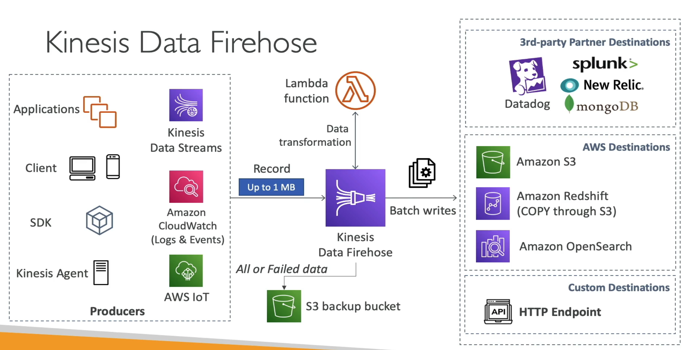

In [14]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/kdf2.jpeg')
new_image = img.resize((690, 350))
display(new_image)

#### Setup Kinesis Data Firehose:
- Go to Kinesis Console
- Create a Kinesis Data Stream
    - Go to Delivery streams or Data Firehose (left-side pane)
        - Create Delivery Stream
            - Types
                - Direct PUT
                    - Kinesis Agent
                    - AWS Services (IoT services, CloudWatch, EventBridge, etc,.)
                    - SDK API (custom Apps)
                - Kinesis Data Streams *
            - Source
                - Kinesis Data Streams *
                - Kinesis Agent
                - AWS Services (CloudWatch, IoT, EventBridge, etc)
                - SDK
                - Client
                - Applications
                - Amazon MSK (Amazon Managed Streaming for Apache Kafka)
                - MySQL DB
                - PostgresSQL DB
            - Destination
                - Amazon S3 *
                - LogicMonitor
                - Amazon OpenSearch
                - HTTP endpoint
                - MongoDB
                - Splunk
                - NewRelic
                - DataDog
                - Dynatrace
                - Snowflake
                - Iceberg Tables
                - Elastic
                - Coralogix
                - Logz.io
                - Honeycomb
                - SumoLogic
            - Destination Settings
                - S3 bucket URI (browse/drop-down)
                    - Create a bucket (if no exiting bucket)
                - New line delimiter
            - Delivery Stream Name
            - Transform and convert records (optional)
                - With AWS Lambda
                    - Data Transformation
                        - Enabled
                            - Lambda Function 
                                - ARN
                                - Version/Alias
                                - Create a Lambda Function (if not available)
                            - Buffer Size
                            - Buffer Time
                    - Record Format Conversion
                        - Enabled
                            - Output Format
                                - Apache Parquet (efficient data storage and retrieval)
                                - Apache ORC (Optimized Row Columnar)
                            - Schema for Source Records
                                - AWS Glue Region
                                - AWS Glue Database
                                - AWS Glue Table
                                    - Version
                                    - Create Table
                    - Decompress source records from Amazon CloudWatch Logs
            - Dynamic Partitioning
                - Multi record de-aggregation
                    - type
                        - Delimiter
                           - Value 
                        - JSON
                - Inline parsing for JSON
                - Dynamic Partitioning Keys
                    - Key Name
                    - JQ Expression
            - S3 bucket prefix
            - S3 bucker error output prefix
            - Buffer Hints, Compression, Encryption
                - Buffer Size
                - Buffer Interval
                - S3 compression and encryption
                    - Compression
                        - GZIP
                        - Snappy
                        - ZIP
                        - Hadoop-Compatible Snappy
                    - File Extension Format
                    - Encryption
                        - KMS
            - Advanced Settings
                - Client Side encryption
                - Amazon CloudWatch error logging
                - Permissions
                    - Create or Update IAM Role
                    - Choose existing IAM Role  
            - Create


Note:

- Kinesis Data Firehose functions:
    - Ingest
    - Transform
    - Load


##### Dynamic Partitioning - Kinesis Data Firehose:

Example Record below:

In [15]:
{ 
    "type": {
      "device": "mobile",
      "event": "user_clicked_submit_button"
    },
    "customer_id": "1234567890",
    "event_timestamp": 1565382027, #epoch timestamp
    "region": "pdx"
}

{'type': {'device': 'mobile', 'event': 'user_clicked_submit_button'},
 'customer_id': '1234567890',
 'event_timestamp': 1565382027,
 'region': 'pdx'}

|  Dynamic partitioning key name |  Dynamic partitioning JQ expression  |
| --- | --- | 
|  customer_id  |  .customer_id  |
|  device  |  .type.device  |

In [16]:
# Dynamic Partition Key Name - Dynamic Partition JQ Expression:
# year  -  .event_timestamp | strftime("%Y")
# month  -  .event_timestamp | strftime("%m")
# day -  .event_timestamp|strftime("%d")
# hour  -  .event_timestamp | strftime("%H")

#### Kinesis Data Analytics - SQL Applications:

TYPE I:
- Use SQL statements to perform data analytics
- Fully managed service
- Pay per actual consumption
- Automatic Scaling

Sources:
- Kinesis Data Streams
- Kinesis Data Firehose
- Amazon S3 (to enrich data)

Destination:
- Kinesis Data Streams 
    - AWS Lambda -> anywhere
    - Application -> anywhere
- Kinesis Data Firehose
    - Amazon S3
    - Amazon Redshift
    - Amazon OpenSearch

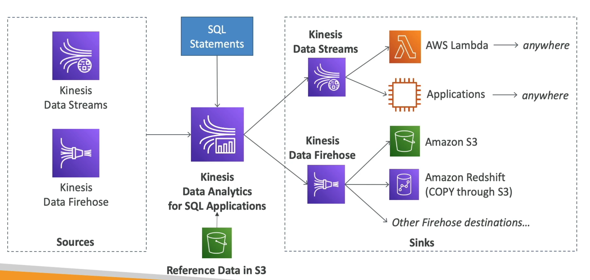

In [17]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/kda-sql.jpeg')
new_image = img.resize((590, 280))
display(new_image)

##### Kinesis Data Analytics (Amazon Managed Service) for Apache Flink:

TYPE II:
- Use Flink (Java, Scala, SQL) to process and analyze streaming data
- Flink is more powerful than standard SQL (advanced querying capabilities)
- Flink Applications (code written) which is allowed to run on the cluster provisioned in Kinesis Data Analytics
- Flink Application can read from 2 sources
    - Kinesis Data Analytics
    - Amazon MSK
- Parallel computation, automatic scaling, provisioning compute service
- Application backups (checkpoints and snapshots)

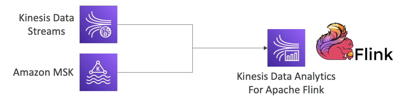

In [18]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/kda-flink.jpeg')
new_image = img.resize((400, 100))
display(new_image)

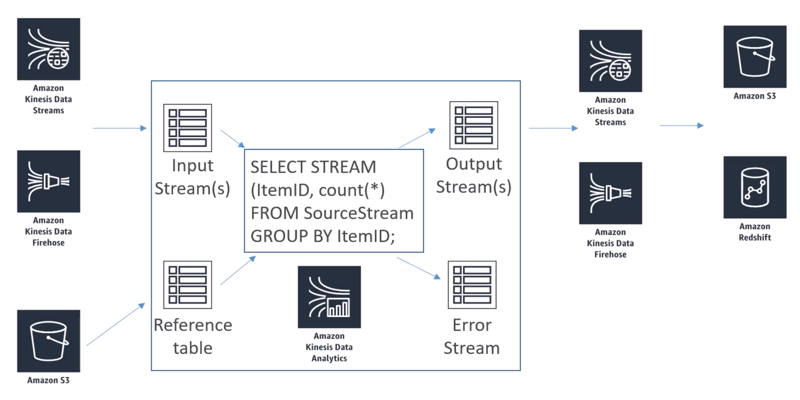

In [19]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/kdaflink11.jpeg')
new_image = img.resize((800, 400))
display(new_image)

The Above Image explained:
- Amazon Kinesis Data streams/Amazon Kinesis Data Firehose both are input streams to Amazon Kinesis Data Analytics
- Amazon S3 is the reference table to Amazon Kinesis Data Analytics to perform inexpensive joins
- We use SQL statements to perform operation on the input streams and reference table to then later output to the output streams and error stream
- The output streams can be Amazon Kinesis Data Streams, Kinesis Data Firehose which can be later send to Amazon S3, Amazon Redshift respectively

Note:
- The reference table:
    - inexpensive way to join data for quick lookups
    - i.e. look up the city associated with zipcode
    - mapping is stored in s3 which is very inexpensive
    - use JOIN command to use data in our queries

##### Setup Amazon Managed Apache Flink - Kinesis Data Analytics:
- Go to Kinesis console
- Create Amazon Managed Apache Flink
    - Setup method
        - Create from scratch
        - Use blueprint
    - Apache Flink Config
        - Version
    - Application Config
        - Name
        - Description
        - IAM Access for Apache Flink
            - Create 
            - Choose
    - Automatic System Rollback
    - Template for Application Settings
        - Production
        - Development
    - Create

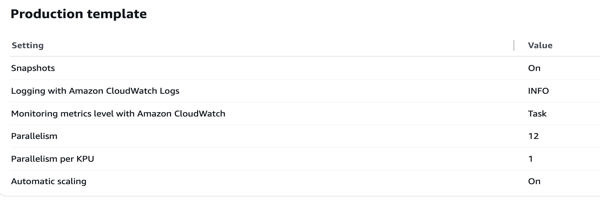

In [20]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/kda-flink1.jpeg')
new_image = img.resize((600, 200))
display(new_image)

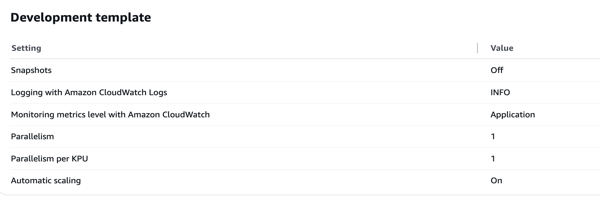

In [21]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/kda-flink2.jpeg')
new_image = img.resize((600, 200))
display(new_image)

##### Kinesis Data Analytics - Pricing:
- Pay for resources consumed 
    - charged by KPU consumed (Kinesis Processing Units)
    - 1 KPU = 1 vCPU + 4 GB

##### Random Cut Forest:
- It is a SQL function used to identify anomaly on numeric columns in a stream

#### Kinesis vs SQS vs SNS:

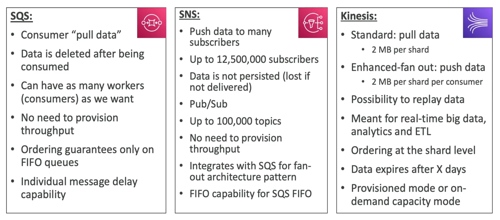

In [22]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/compare.jpeg')
new_image = img.resize((500, 220))
display(new_image)